In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\Abhinov Baruah\\Documents\\CAPSTONE PROJECT II'

In [3]:
os.listdir()

['.ipynb_checkpoints', 'Data', 'Telcom_Churn_ML.ipynb']

In [4]:
os.chdir('C:\\Users\\Abhinov Baruah\\Documents\\CAPSTONE PROJECT II\Data')

<b>Data Exploration</b>

In [5]:
# Read DS
telcom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns',None)

In [6]:
# Print info
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [88]:
# Print header
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [91]:
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
# Look at the unique values in the telcom DS
telcom.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
# Looking at the unique values of the features:
telcom['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [10]:
telcom['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [11]:
telcom['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

<b> NULL MODEL </b>:
<br>Null model creation for reference,where the null accuracy is the accuracy of the model if we always choose the most frequent class(or outcome). Accuracy is determined as: 
                     <br>**accuracy = # times the model is right/total number of predictions**

In the telecom dataset case null accuracy would be:
                    <b>Null Accuracy </b>= <b># times the model predicted customer 'stayed'/total number of predictions</b>.
The target variable in this case is 'Churn' from the Dataset 'YES' i.e. Churned or 'NO' i.e. Stayed

In [12]:
# Null model for Telcom Dataset:
telcom['Churn'].value_counts()/len(telcom)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

The Null Accuracy in this case is 0.73 or 73% which suggest that any ML model has to be better performance than 73%

<b>Data Cleaning</b>

In [13]:
# Dropping CustomerID column as it has no bearing or predictive power on the ML model

telcom.drop('customerID',axis=1,inplace=True)
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# Converting the TotalCharges to numeric column as its a object type.

telcom['TotalCharges'] = pd.to_numeric(telcom['TotalCharges'],errors='coerce')

In [15]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
# print the number of missing values in Telcom Dataset

telcom.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
telcom.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <a list of 10 Patch objects>)

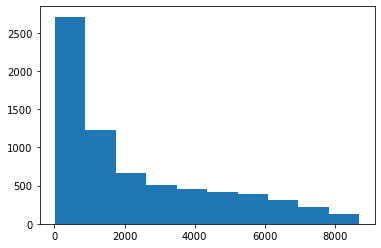

In [18]:
# Look at the distribution of TotalCharges column:

plt.hist(telcom['TotalCharges'].dropna())

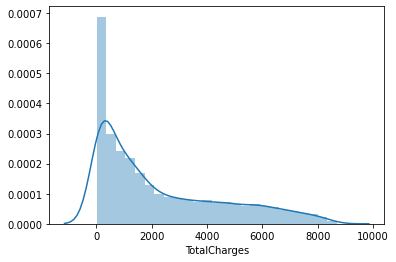

In [19]:
sns.distplot(telcom['TotalCharges'])

In [20]:
# Values of the distibution of TotalCharges:

telcom['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [21]:
# Replacing the NaN in TotalCharges column with median value using .loc operator:

telcom.loc[telcom['TotalCharges'].isna(),'TotalCharges'] = telcom['TotalCharges'].median()

In [22]:
# Transform Senior citizen column to No for 0 and Yes for 1:

telcom['SeniorCitizen'].replace({0:'No',1:'Yes'},inplace=True)

In [23]:
# Checking again for Missing Data:

telcom.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [94]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**UNDERSAMPLING THE MAJORITY CLASS DATA**

In [24]:
telcom['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [25]:
shuffled_telco = telcom.sample(frac=1,random_state=4)

In [26]:
Churners = shuffled_telco[shuffled_telco['Churn']=='Yes']
Churners.shape

(1869, 20)

In [27]:
Non_Churners = shuffled_telco[shuffled_telco['Churn']=='No'].sample(n=2000,random_state=123)
Non_Churners.shape

(2000, 20)

In [29]:
telco = pd.concat([Non_Churners,Churners])

In [30]:
telco['Churn'].value_counts()

No     2000
Yes    1869
Name: Churn, dtype: int64

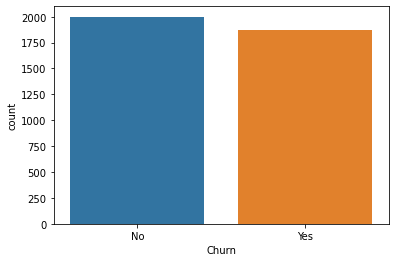

In [31]:
sns.countplot(x='Churn',data=telco)

In [ ]:
newdf = pd.DataFrame(np.repeat(Churners.values,3,axis=0))
newdf.columns = Churners.columns
print(newdf)

**We are dealing with a Class Imbalance problem here**
<br> *While calculating the NULL MODEL ACCURACY we obsereve that the accuracy for NON CHURNERS was 73% and that for CHURNERS was 26%.*

In [32]:
Churners.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6786,Female,No,No,No,11,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Credit card (automatic),48.55,501.0,Yes
3371,Female,No,Yes,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,180.3,Yes
6012,Female,No,Yes,Yes,5,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.60,404.2,Yes
2748,Male,No,No,No,4,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.55,174.3,Yes
1244,Female,No,No,No,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.40,289.3,Yes


<b> Exploratory Data Analysis (IMBALANCED DATA SET) </b>

In [33]:
# Display the header for Telcom
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
# Get the a look a the data types of Telcom Dataset
telcom.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [35]:
# get features of Telcom Dataset except the response variable 'CHURN':

features = [col_name for col_name in telcom.columns if col_name != 'Churn']

# get the categorical columns from feautures:

categorical = [col for col in features if telcom[col].dtype=='object']

# get the numerical/continous columns from features:

numerical = [col for col in features if col not in categorical]

In [36]:
numerical

['tenure', 'MonthlyCharges', 'TotalCharges']

In [37]:
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

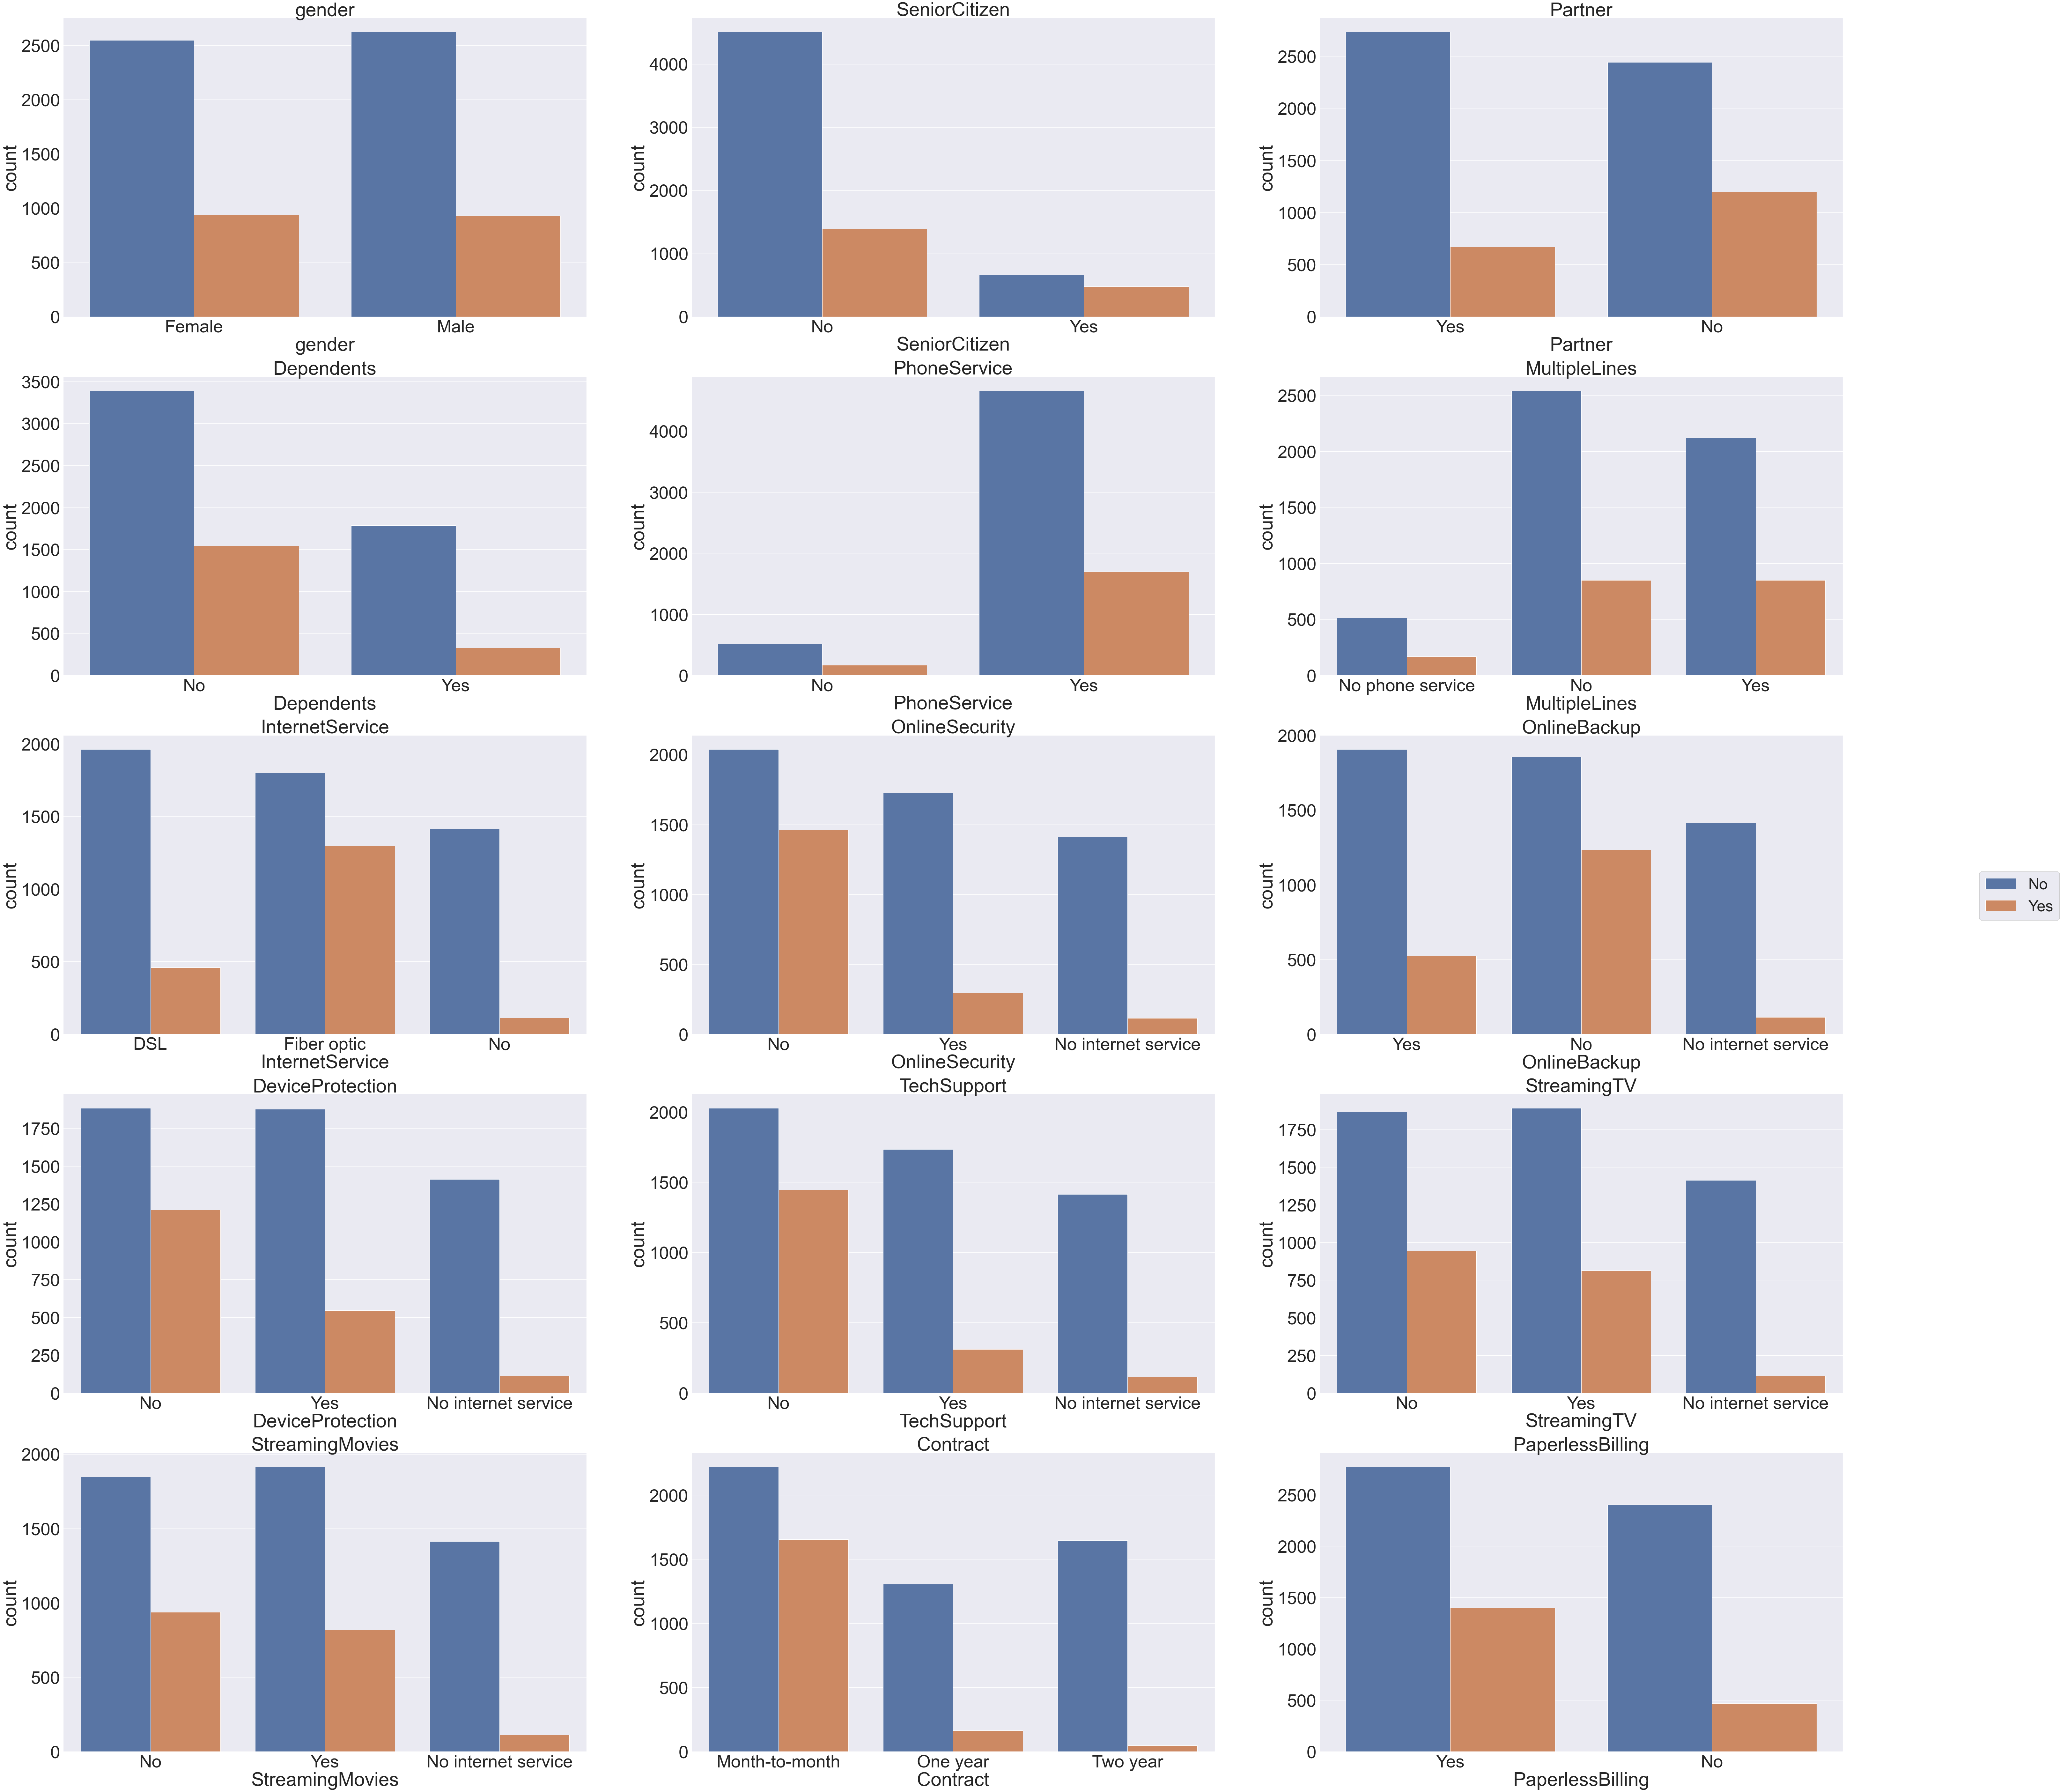

In [38]:
# Visualizing the target variable(Churn) relationship with the categorical features in the telcom dataset:

# import seaborn package:

import seaborn as sns

# Set the asthetics for better view/display:

plt.rcParams["axes.labelsize"] = 5
sns.set(font_scale=5)

# Create figs and axes:

fig,axes = plt.subplots(5,3,figsize=(100,100))

# Iterate over each axes and plot a count plot with categorical features:

for ax,col in zip(axes.flatten(),categorical):
    
    # Create countplot
    sns.countplot(data=telcom,x=col,hue = 'Churn',ax = ax)
    
    # set title
    ax.set_title(col)
    
    # improve legends
    handles,labels = ax.get_legend_handles_labels()
    fig.legend(handles,labels,loc='right',fontsize=48)
    ax.get_legend().remove()

    

Obeservation 1: Gender has 50-50 split on Churn.
<br>Observation 2: Fiber Optics in Internet Services has a lot of Churners.
<br>Observation 3: Online Security,Online Backup, DeviceProtection, TechSupport Users seem to have less Churns.

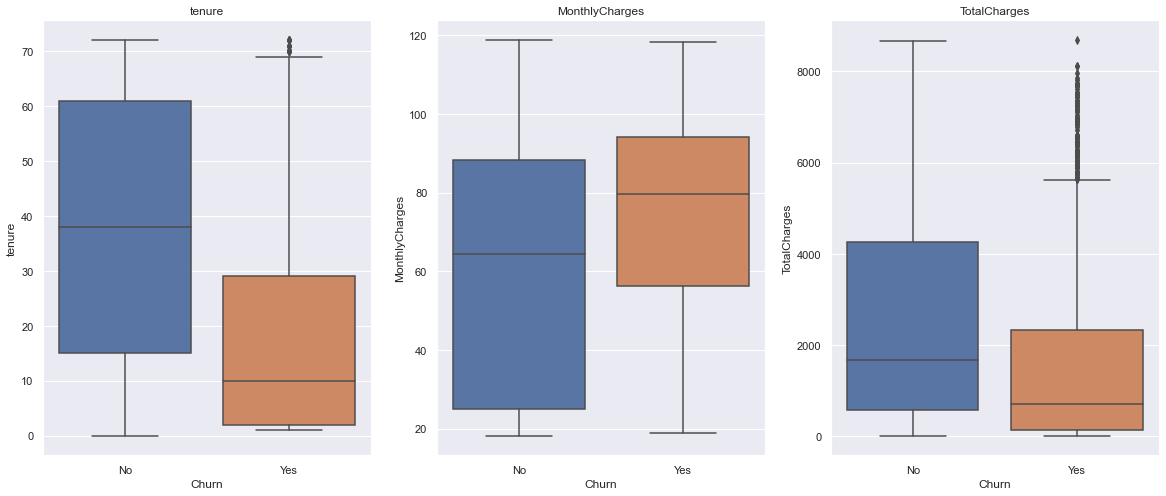

In [39]:
# Visualizing the target variable(Churn) relationship with numerical/continous features:

# Setting asthetics for better view:

plt.rcParams["axes.labelsize"]=1
sns.set(font_scale=1)

# Create figure and axes:

fig,axes =plt.subplots(1,3,figsize=(20,8))

# iterate over axes,plot a boxplot with numeric columns:

for ax,col in zip(axes.flatten(),numerical):
    
    # create boxplot:
    sns.boxplot(data=telcom,x='Churn',y=col,ax=ax)
    
    # Set title:
    ax.set_title(col)




Observation 1 : High Monthly Charges is related to CHURN
<br>Observation 2 : Churners have relatively low tenure compared to Non-Churners

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC218C1240>,
      dtype=object)

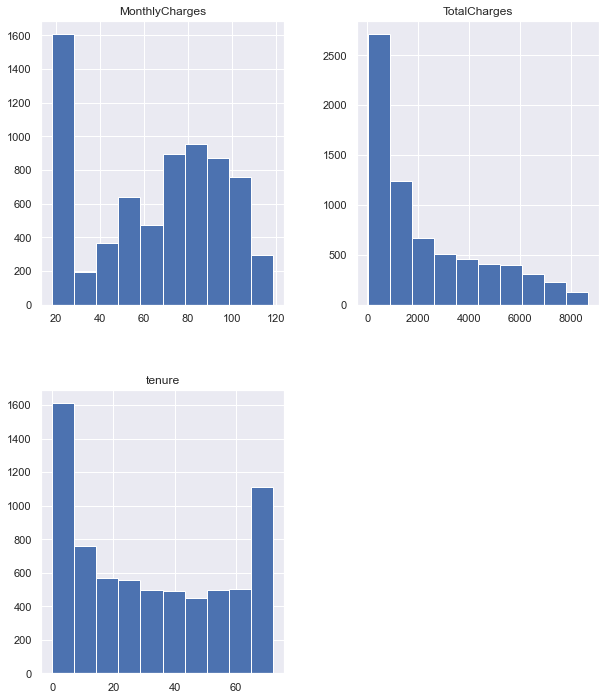

In [40]:
#fig,ax = plt.subplots()
telcom.hist(bins=10,figsize=(10,12))
#fig.tight_layout()

<b> EXPLORATORY DATA ANALYSIS (UNDERSAMPLED DS) 

In [41]:
# get features of Telcom Dataset except the response variable 'CHURN':

feature1 = [col_name for col_name in telco.columns if col_name != 'Churn']

# get the categorical columns from feautures:

categorical1 = [col for col in feature1 if telco[col].dtype=='object']

# get the numerical/continous columns from features:

numerical1 = [col for col in feature1 if col not in categorical1]

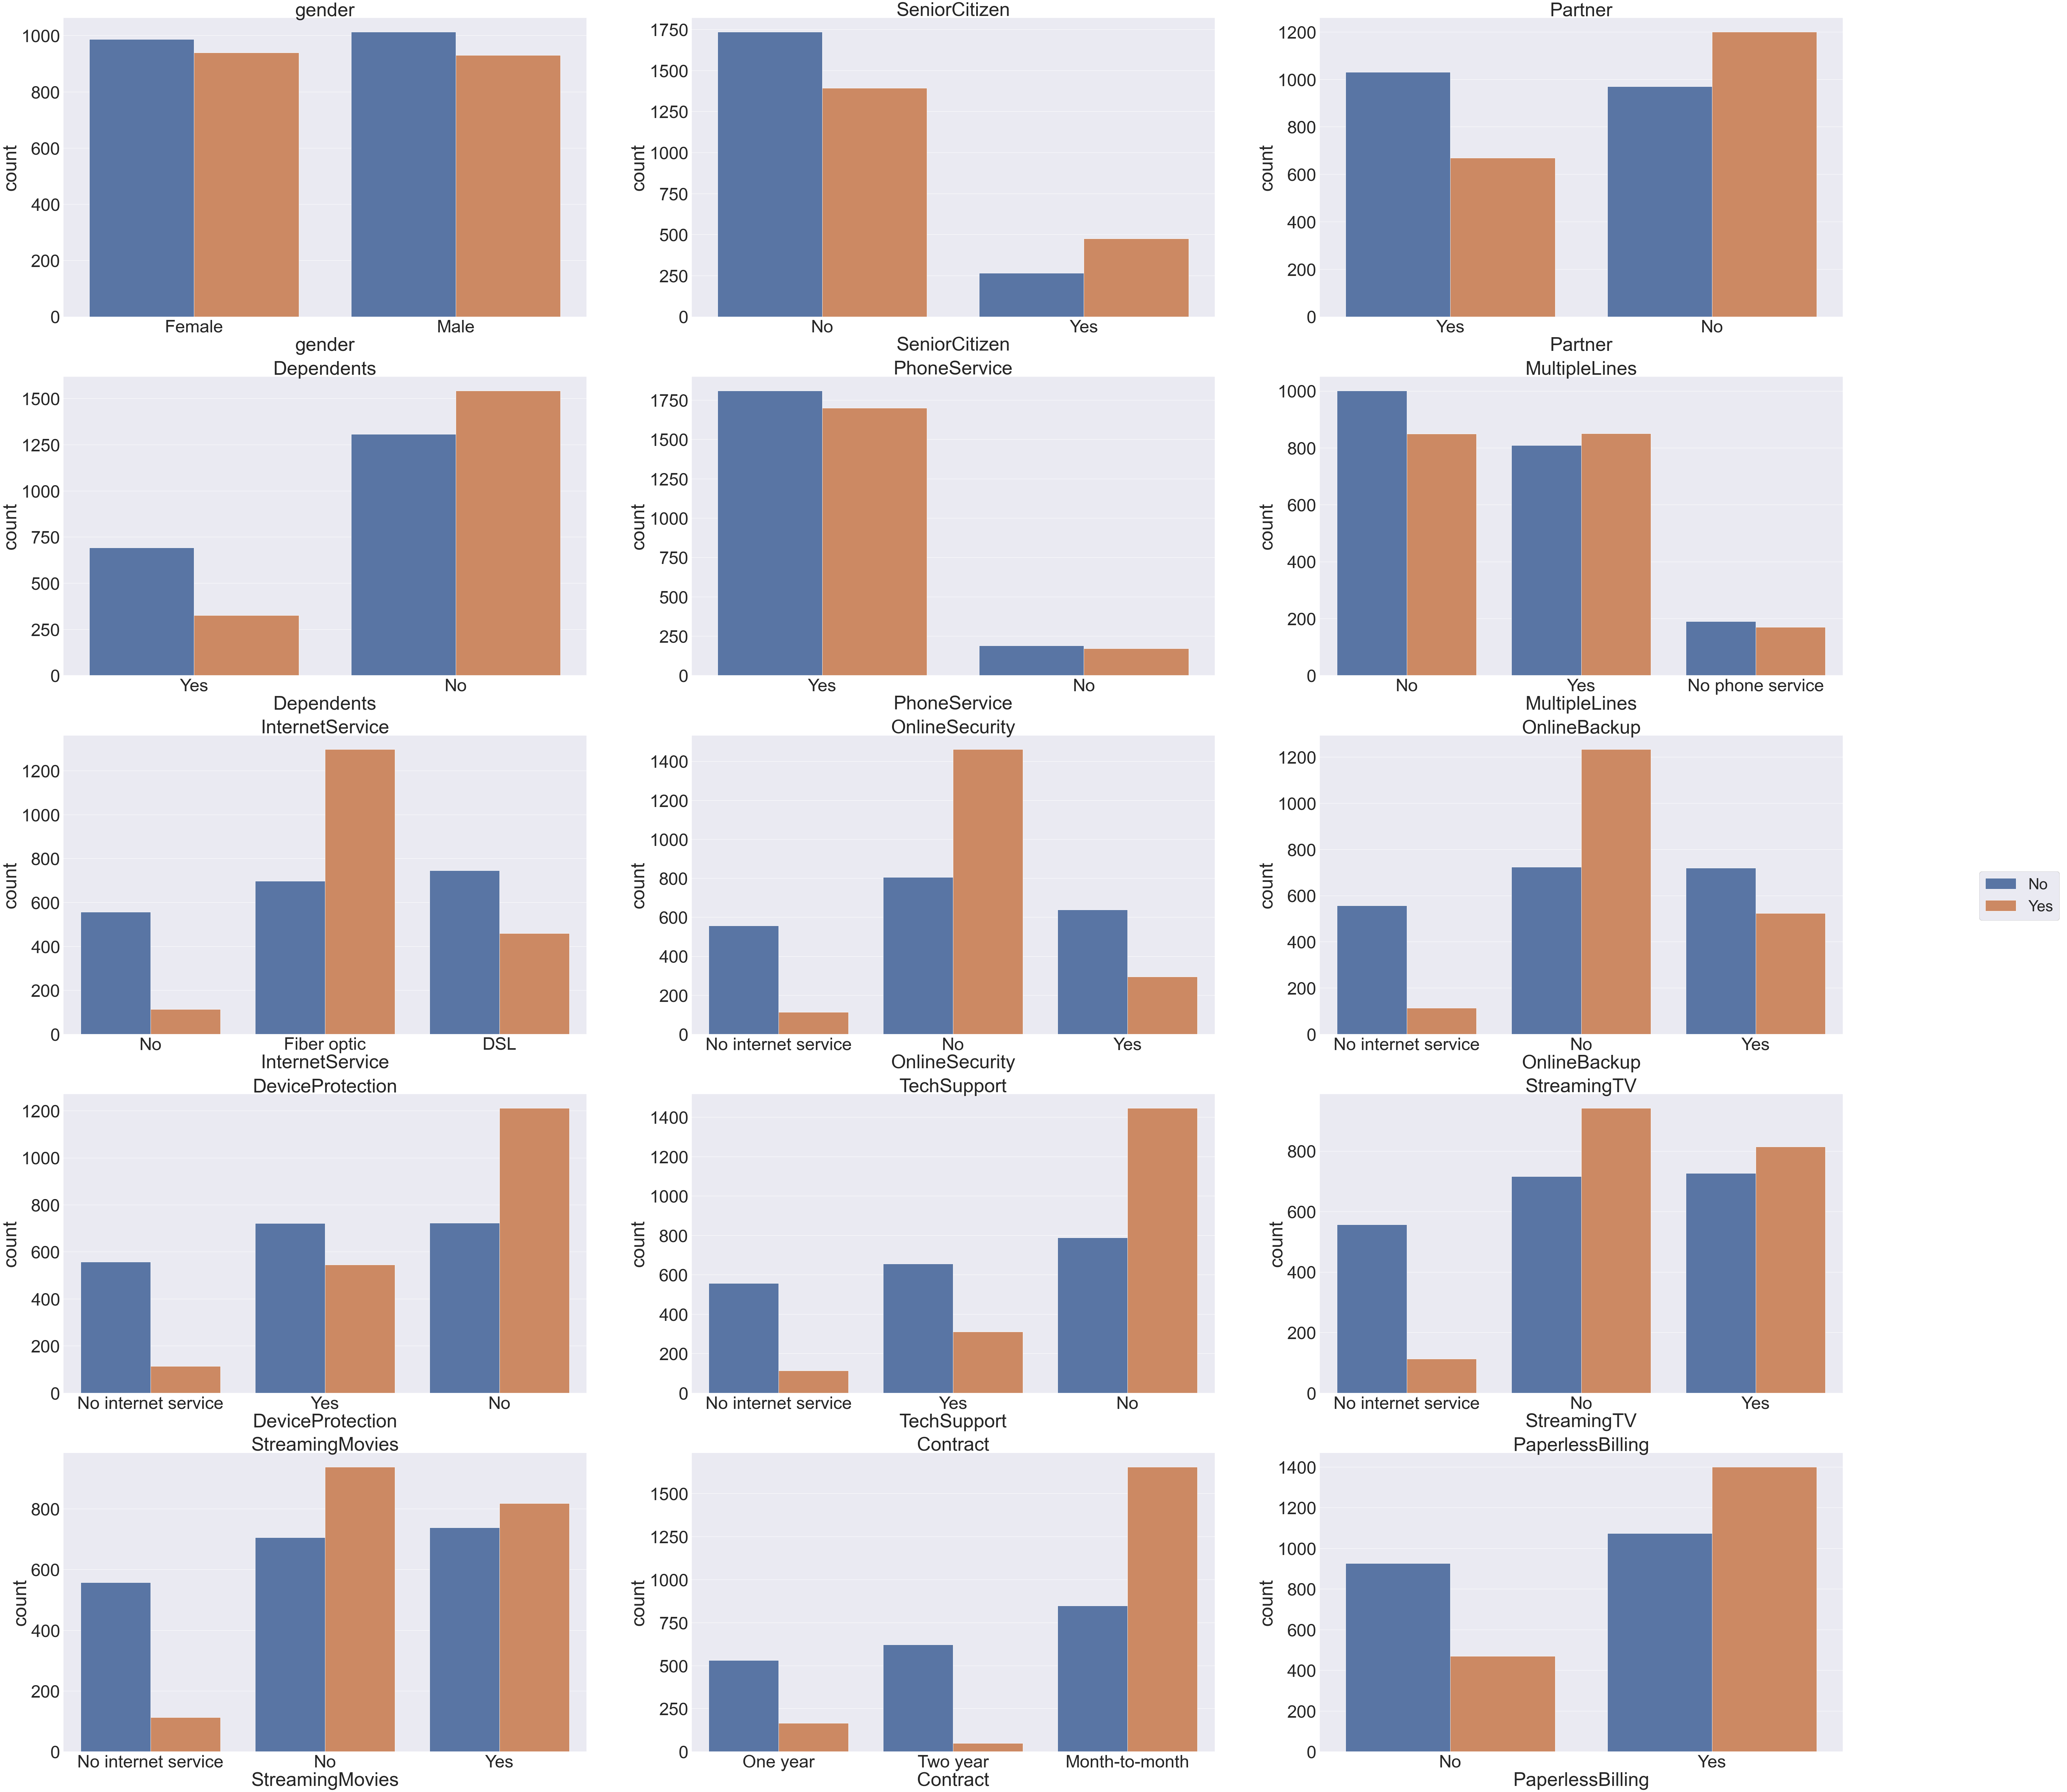

In [42]:
# Visualizing the target variable(Churn) relationship with the categorical features in the telco dataset:

# Set the asthetics for better view/display:

plt.rcParams["axes.labelsize"] = 5
sns.set(font_scale=5)

# Create figs and axes:

fig,axes = plt.subplots(5,3,figsize=(100,100))

# Iterate over each axes and plot a count plot with categorical features:

for ax,col in zip(axes.flatten(),categorical1):
    
    # Create countplot
    sns.countplot(data=telco,x=col,hue = 'Churn',ax = ax)
    
    # set title
    ax.set_title(col)
    
    # improve legends
    handles,labels = ax.get_legend_handles_labels()
    fig.legend(handles,labels,loc='right',fontsize=48)
    ax.get_legend().remove()

    

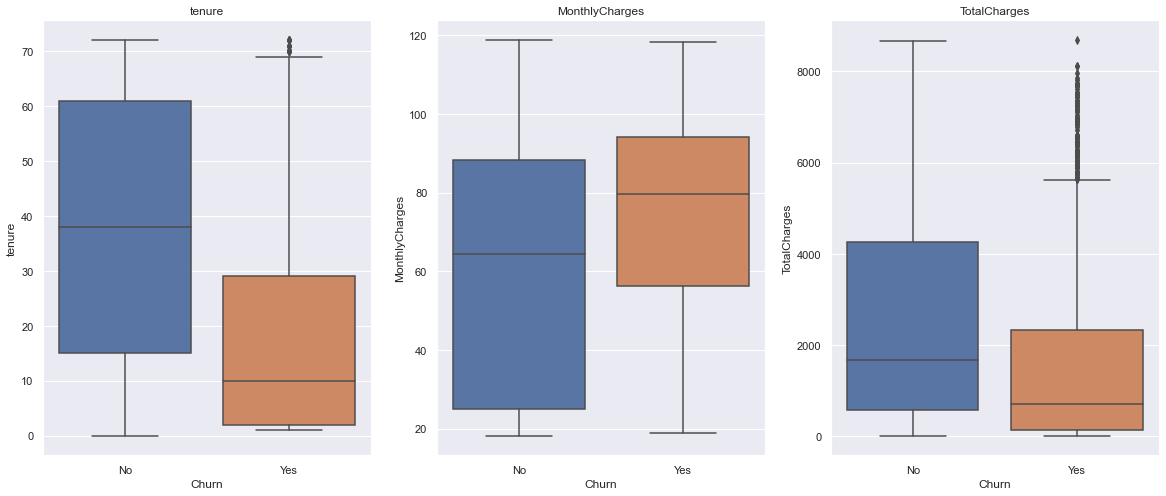

In [43]:
#Visualizing the target variable(Churn) relationship with numerical/continous features:

# Setting asthetics for better view:

plt.rcParams["axes.labelsize"]=1
sns.set(font_scale=1)

# Create figure and axes:

fig,axes =plt.subplots(1,3,figsize=(20,8))

# iterate over axes,plot a boxplot with numeric columns:

for ax,col in zip(axes.flatten(),numerical1):
    
    # create boxplot:
    sns.boxplot(data=telcom,x='Churn',y=col,ax=ax)
    
    # Set title:
    ax.set_title(col)


**Data Pre Processing for ML**

In [44]:
# Split the data between X and Y(target variable):

X= telcom[features]
y= telcom['Churn'].replace({'No':0,'Yes':1})

In [45]:
# Import Train Test Split from sklearn.model_selection

from sklearn.model_selection import train_test_split

# split the data into Train and Test 

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.25,random_state=123)

*Training the NEW UNDERSAMPLED DATASET*

In [46]:
X1= telco[feature1]
y1= telco['Churn'].replace({'No':0,'Yes':1})

In [47]:
from sklearn.model_selection import train_test_split

train_X1,test_X1,train_y1,test_y1 = train_test_split(X1,y1,test_size=0.25,random_state=123)

*Standardization of Numerical Features*

In [48]:
# Standardize the magnitude of numerical features in the data by importing StandarScaler from sklearn.preprocessing:

from sklearn.preprocessing import StandardScaler

# Initialise a scaler object:

scaler = StandardScaler()

# Fit training data:

scaler.fit(train_X[numerical])

# Transform train and test data:

train_numeric_transform = scaler.transform(train_X[numerical])
test_numeric_transform = scaler.transform(test_X[numerical])

# Replace the columns in test and train X data:

train_X[numerical] = train_numeric_transform
test_X[numerical] = test_numeric_transform

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Abhinov Baruah\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

*Standardize the Numerical features for UNDERSAMPLED DATASET*

In [49]:
from sklearn.preprocessing import StandardScaler

scaler_under = StandardScaler()

scaler_under.fit(train_X1[numerical1])

trainX1_numeric_trnsfrm = scaler_under.transform(train_X1[numerical1])
testX1_numeric_trnsfrm = scaler_under.transform(test_X1[numerical1])


train_X1[numerical1] = trainX1_numeric_trnsfrm
test_X1[numerical1] = testX1_numeric_trnsfrm

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Abhinov Baruah\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A

*Encoding the Categorical Features in the data* 

In [50]:
# Encoding the categorical variables in Telecom data:

train_X = pd.get_dummies(train_X,columns=categorical,drop_first= True)
test_X = pd.get_dummies(test_X,columns=categorical,drop_first= True)



In [51]:
train_X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2901 entries, 2752 to 902
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2901 non-null   object 
 1   SeniorCitizen     2901 non-null   object 
 2   Partner           2901 non-null   object 
 3   Dependents        2901 non-null   object 
 4   tenure            2901 non-null   float64
 5   PhoneService      2901 non-null   object 
 6   MultipleLines     2901 non-null   object 
 7   InternetService   2901 non-null   object 
 8   OnlineSecurity    2901 non-null   object 
 9   OnlineBackup      2901 non-null   object 
 10  DeviceProtection  2901 non-null   object 
 11  TechSupport       2901 non-null   object 
 12  StreamingTV       2901 non-null   object 
 13  StreamingMovies   2901 non-null   object 
 14  Contract          2901 non-null   object 
 15  PaperlessBilling  2901 non-null   object 
 16  PaymentMethod     2901 non-null   object

*Encoding the same for Undersampled Dataset*

In [52]:
train_X1 = pd.get_dummies(train_X1,columns=categorical1,drop_first = True)
test_X1 = pd.get_dummies(test_X1,columns=categorical1,drop_first = True)

In [53]:
train_X1

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2752,0.113356,-1.122570,-0.454611,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6737,1.443033,1.428998,2.182584,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0
3833,-0.676140,0.237000,-0.569202,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
5759,-1.133216,0.078067,-0.915511,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
612,1.567690,-1.635648,-0.326684,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,-0.260616,0.660246,-0.100867,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2866,-0.676140,0.577324,-0.482132,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4946,-1.008559,0.452942,-0.791656,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2140,0.196461,0.630878,0.308651,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [54]:
train_y1

2752    1
6737    0
3833    0
5759    1
612     0
       ..
2878    0
2866    0
4946    1
2140    1
902     1
Name: Churn, Length: 2901, dtype: int64

**Feature Engineering**

While viweing the Categorical features in EDA for telcom dataset we observed that customers who had subscribed to Online Security,Online Backup, DeviceProtection, TechSupport were less prone to Churn.We can add a new feature called **in_ecosystem** which lets us know the count of services a customer has subscribed to. 

In [55]:
# Re-adding Churned to add to train and test:

train_X['Churn'] = train_y
test_X['Churn'] = test_y

In [56]:
train_X.Churn.value_counts()

0    3912
1    1370
Name: Churn, dtype: int64

In [57]:
# Check header:
train_X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
6464,0.707712,0.185175,0.513686,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
5707,-1.248999,-0.641538,-0.979548,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3442,-0.148349,1.133562,0.226798,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0
3932,-1.248999,0.458524,-0.950682,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
6124,0.993065,-0.183179,0.433822,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0


In [58]:
test_X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
941,-0.800586,-1.154900,-0.847602,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1404,0.096240,-1.383246,-0.663773,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0
5515,-0.596762,-1.514920,-0.879924,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
3684,0.422358,0.351852,0.383777,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
7017,0.748476,-1.471584,-0.564680,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0


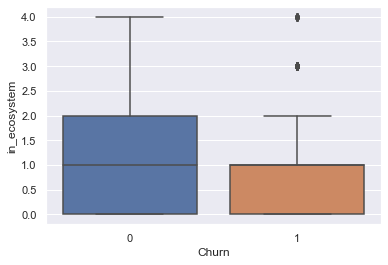

In [59]:
# Create service columns:
service_columns = ['OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes']

# Create in_ecosystem column:

train_X['in_ecosystem'] = train_X[service_columns].sum(axis=1)

# Visualise the Churn by # of servces subscribed:

sns.boxplot(data=train_X,x='Churn',y='in_ecosystem')

In [60]:
# Create feature that is 1 if 2 or more services sunscribed by customer,or else put 0:

train_X['in_ecosystem'] = np.where(train_X['in_ecosystem'] >=2, 1, 0)

# Apply the same to test_X

test_X['in_ecosystem'] = test_X[service_columns].sum(axis=1)
test_X['in_ecosystem'] = np.where(test_X['in_ecosystem'] >=2, 1, 0)

In [61]:
# Drop the target respone variable CHURN from the train and test data:

train_X.drop('Churn',axis=1,inplace=True)
test_X.drop('Churn',axis=1,inplace=True)

In [62]:
train_X.shape

(5282, 31)

*Feature Engineering for UNBALANCED DATASET*

In [63]:
train_X1['Churn'] = train_y1
test_X1['Churn'] = test_y1

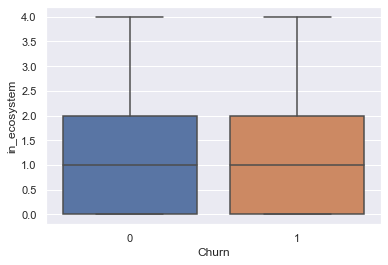

In [64]:
# Create service columns:
service_columns = ['OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes']

# Create in_ecosystem column:

train_X1['in_ecosystem'] = train_X1[service_columns].sum(axis=1)

# Visualise the Churn by # of servces subscribed:

sns.boxplot(data=train_X1,x='Churn',y='in_ecosystem')

In [65]:
train_X1['in_ecosystem'] = np.where(train_X1['in_ecosystem']>=2,1,0)

test_X1['in_ecosystem'] = test_X1[service_columns].sum(axis=1)
test_X1['in_ecosystem'] = np.where(test_X1['in_ecosystem']>=2,1,0)

In [66]:
train_X1.drop('Churn',axis=1,inplace=True)
test_X1.drop('Churn',axis=1,inplace=True)

**MODELLING**

*KNeighborsClassifier*

In [67]:
# K-Nearest Neighbours to Generate Predictions.It tries to find the lable of unseen data by choosing
# the label of the K closest points to it.

# import KNeighborsClassifier() from sklearn.neighbors

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

# Instantiate K Nearest Neighbors:
knn = KNeighborsClassifier(n_neighbors=6)

# fit on the training data:
knn.fit(train_X,train_y)

# predict on test and train data:
pred_test_y = knn.predict(test_X)
pred_train_y = knn.predict(train_X)    

# Check Accuracy:
test_accuracy = accuracy_score(test_y,pred_test_y)
train_accuracy = accuracy_score(train_y,pred_train_y)

# Print test accuracy:
print("Test Accuracy: " + str(round(test_accuracy,4)))
print('Train Accuracy: '+ str(round(train_accuracy,4)))


Test Accuracy: 0.7672
Train Accuracy: 0.8364


In [68]:
# K-Nearest Neighbours to Generate Predictions.It tries to find the lable of unseen data by choosing
# the label of the K closest points to it.

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

knn_under = KNeighborsClassifier(n_neighbors=6)

knn_under.fit(train_X1,train_y1)

pred_under_testy =  knn_under.predict(test_X1)
pred_under_trainy = knn_under.predict(train_X1)

# Check Accuracy:
test_under_accuracy = accuracy_score(test_y1,pred_under_testy)
train_under_accuracy = accuracy_score(train_y1,pred_under_trainy)

print('Test Accuracy for Undersampled Data: ' + str(round(test_under_accuracy,4)))
print('Train Accuracy for Undersampled Data: ' + str(round(train_under_accuracy,4)))


Test Accuracy for Undersampled Data: 0.7459
Train Accuracy for Undersampled Data: 0.8042


<b>*DecisionTreeCLassifier and Random Forest*

In [69]:
# Using Decision Trees (classification models) and Random Forest (ensemble methods):

# Decision Tree and RandomForest:

# import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# import RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Instantiate Decision tree and Random Forest classifier:
dec_tree = DecisionTreeClassifier(random_state=123)
rand_forest = RandomForestClassifier(random_state=123)

# fit the data on the train:
dec_tree.fit(train_X,train_y)
rand_forest.fit(train_X,train_y)

# predict on test and train data for decision tree

pred_tree_test_y = dec_tree.predict(test_X)
pred_tree_train_y = dec_tree.predict(train_X)

# predict on test and train data for random forest

pred_forest_test_y = rand_forest.predict(test_X)
pred_forest_train_y = rand_forest.predict(train_X)

# Calculate the accuracy score for train and test data for Decision tree

Test_Accuracy_tree = accuracy_score(test_y,pred_tree_test_y)
Train_Accuracy_tree = accuracy_score(train_y,pred_tree_train_y)

# Calculate the accuracy score for train and test data for Random Forest

Test_Accuracy_forest = accuracy_score(test_y,pred_forest_test_y)
Train_Accuracy_forest = accuracy_score(train_y,pred_forest_train_y)

# Print test accuracy for Decision tree:
print("Test Accuracy for Decision Tree : " + str(round(Test_Accuracy_tree,4)))
print('Train Accuracy for Decision Tree : '+ str(round(Train_Accuracy_tree,4)))

# Print test accuracy for Random forest:
print("\nTest Accuracy for Random Forest : " + str(round(Test_Accuracy_forest,4)))
print('Train Accuracy for Random Forest : '+ str(round(Train_Accuracy_forest,4)))



Test Accuracy for Decision Tree : 0.7178
Train Accuracy for Decision Tree : 0.9977

Test Accuracy for Random Forest : 0.7825
Train Accuracy for Random Forest : 0.9977


In [70]:
from sklearn.metrics import confusion_matrix

# print(confusion_matrix(test_y1,pred_undertree_test_y))

from sklearn.metrics import classification_report

print('The Classsification Report for Decison Tree Model:\n')
print(classification_report(test_y,pred_tree_test_y))

The Classsification Report for Decison Tree Model:

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1262
           1       0.50      0.45      0.48       499

    accuracy                           0.72      1761
   macro avg       0.65      0.64      0.64      1761
weighted avg       0.71      0.72      0.71      1761



*UNDERSAMPLED DATA DECISON TREE MODEL*

In [95]:
# Using Decision Trees (classification models) for the UNDERSAMPLED DATA

# Decision Tree and RandomForest:

# import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate Decision tree and Random Forest classifier:
dec_under_tree = clf_undertree.best_estimator_

# fit the data on the train:
dec_under_tree.fit(train_X1,train_y1)

# predict on test and train data for decision tree

pred_undertree_test_y = dec_under_tree.predict(test_X1)
pred_undertree_train_y = dec_under_tree.predict(train_X1)

# Calculate the accuracy score for train and test data for Decision tree

Test_Accuracy_Undertree = accuracy_score(test_y1,pred_undertree_test_y)
Train_Accuracy_Undertree = accuracy_score(train_y1,pred_undertree_train_y)


# Print test accuracy for Decision tree:
print("Test Accuracy for Decision Tree(Undersampled Data) : " + str(round(Test_Accuracy_Undertree,4)))
print('Train Accuracy for Decision Tree(Undersampled Data) : '+ str(round(Train_Accuracy_Undertree,4)))

#Accuracy before Hyperparameter tuning:
# Test Accuracy for Decision Tree(Undersampled Data) : 0.687
# Train Accuracy for Decision Tree(Undersampled Data) : 0.9979

Test Accuracy for Decision Tree(Undersampled Data) : 0.7262
Train Accuracy for Decision Tree(Undersampled Data) : 0.7925


In [96]:
from sklearn.metrics import confusion_matrix

# print(confusion_matrix(test_y1,pred_undertree_test_y))

from sklearn.metrics import classification_report

print('The Classsification Report for Decision Tree Model(Undersampled Data):\n')
print(classification_report(test_y1,pred_undertree_test_y))

The Classsification Report for Decision Tree Model(Undersampled Data):

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       500
           1       0.71      0.75      0.72       468

    accuracy                           0.73       968
   macro avg       0.73      0.73      0.73       968
weighted avg       0.73      0.73      0.73       968



In [97]:
# Random Forest (ensemble methods):
# import RandomForestClassifier from sklearn.ensemble

from sklearn.ensemble import RandomForestClassifier

rand_under_forest = grid.best_estimator_

rand_under_forest.fit(train_X1,train_y1)

# predict on test and train data for random forest

pred_underforest_test_y = rand_under_forest.predict(test_X1)
pred_underforest_train_y = rand_under_forest.predict(train_X1)


# Calculate the accuracy score for train and test data for Random Forest

Test_Accuracy_underforest = accuracy_score(test_y1,pred_underforest_test_y)
Train_Accuracy_underforest = accuracy_score(train_y1,pred_underforest_train_y)

# Print test accuracy for Random forest:
print('The Accuracy scores for the Undersampled Dataset :')
print("\nTest Accuracy for Random Forest : " + str(round(Test_Accuracy_underforest,4)))
print('\nTrain Accuracy for Random Forest : '+ str(round(Train_Accuracy_underforest,4)))

The Accuracy scores for the Undersampled Dataset :

Test Accuracy for Random Forest : 0.7531

Train Accuracy for Random Forest : 0.8042


In [98]:
from sklearn.metrics import confusion_matrix

# print(confusion_matrix(test_y1,pred_undertree_test_y))

from sklearn.metrics import classification_report

print('The Classsification Report for Random Forest Model:\n')
print(classification_report(test_y,pred_forest_test_y))

The Classsification Report for Random Forest Model:

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1262
           1       0.67      0.47      0.55       499

    accuracy                           0.78      1761
   macro avg       0.74      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



In [99]:
from sklearn.metrics import confusion_matrix

# print(confusion_matrix(test_y1,pred_undertree_test_y))

from sklearn.metrics import classification_report

print('The Classsification Report for Random Forest Model(Undersampled Data):\n')
print(classification_report(test_y1,pred_underforest_test_y))

The Classsification Report for Random Forest Model(Undersampled Data):

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       500
           1       0.73      0.78      0.75       468

    accuracy                           0.75       968
   macro avg       0.75      0.75      0.75       968
weighted avg       0.75      0.75      0.75       968



In [ ]:
# Actual = 100
# Predict= 90 (1)
# Accuracy = 60 (1 accurately)
# precision = 60/90 tp/tp+fp(60+30)
# Recall = 60/100 tp/tp+fn (60/60+40)
#                          Actual
#                        Postive   Negative
#     predicted Positive  TP        FP 
#               Negative  FN        TN

**HYPER PARAMETER TUNING FOR DECISION TREE AND RANDOM FOREST**

In [75]:
# Hyper Parameter tuning for Decison Tree Model

from sklearn.model_selection import GridSearchCV
dec = DecisionTreeClassifier(random_state=123)
parameters = {'min_samples_split':[4,8,12],
              'min_samples_leaf':[1,3,5],
              'max_depth':[1,5,12],
              'max_features':['sqrt',12,19,28]
             }
clf = GridSearchCV(dec,parameters)
clf.fit(train_X,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [1, 5, 12],
                         'max_features': ['sqrt', 12, 19, 28],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [4, 8, 12]})

In [76]:
clf.cv_results_

{'mean_fit_time': array([0.02823758, 0.02953601, 0.02352581, 0.02175035, 0.02194438,
        0.02233553, 0.0259326 , 0.02215075, 0.02234397, 0.0203464 ,
        0.02100172, 0.02881269, 0.02711053, 0.02116942, 0.02793374,
        0.02632895, 0.01963377, 0.02293987, 0.02970581, 0.02154908,
        0.02033539, 0.02094207, 0.02054405, 0.02173529, 0.02012372,
        0.0201479 , 0.01984353, 0.02155461, 0.02194686, 0.02671957,
        0.03291273, 0.02272758, 0.02314701, 0.02135377, 0.02273836,
        0.02306867, 0.02229538, 0.0215261 , 0.02234507, 0.02060657,
        0.02152309, 0.02141042, 0.02470551, 0.02495623, 0.02138486,
        0.02674308, 0.03327847, 0.03888187, 0.0424109 , 0.03643923,
        0.0305162 , 0.03004336, 0.03470545, 0.03032851, 0.03510599,
        0.03572879, 0.03929729, 0.03910351, 0.05105658, 0.05068078,
        0.03749561, 0.04068117, 0.03908963, 0.05096107, 0.07160721,
        0.09302726, 0.05904903, 0.06013746, 0.07999334, 0.07637901,
        0.06241798, 0.09975114,

In [77]:
clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [78]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=4,
                       random_state=123)

In [79]:
# Hyper Parameter tuning for Decison Tree Model for Undersampled Data:

from sklearn.model_selection import GridSearchCV
dec = DecisionTreeClassifier(random_state=123)
parameters = {'min_samples_split':[5,15,29],'min_samples_leaf':[2,5,15,23],
              'max_depth':[5,10,18],'max_features':['sqrt',12,19,24,30]}
clf_undertree = GridSearchCV(dec,parameters)
clf_undertree.fit(train_X1,train_y1)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [5, 10, 18],
                         'max_features': ['sqrt', 12, 19, 24, 30],
                         'min_samples_leaf': [2, 5, 15, 23],
                         'min_samples_split': [5, 15, 29]})

In [80]:
clf_undertree.best_estimator_

DecisionTreeClassifier(max_depth=18, max_features=19, min_samples_leaf=23,
                       min_samples_split=5, random_state=123)

In [81]:
dec.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 123,
 'splitter': 'best'}

*HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER*

In [82]:
rand_forest = RandomForestClassifier(random_state=123)
rand_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [83]:
# Hyper parameter tuning for Random Forest classifier :

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(random_state=123)

param = {'n_estimators':[10,50,100],
         'criterion':['gini'],
         'max_features':['sqrt'],
         'max_depth':[5,15,25],
         'min_samples_leaf':[2,5,10],
         }

grid = GridSearchCV(rand_forest,param,cv=3)

grid.fit(train_X1,train_y1)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini'], 'max_depth': [5, 15, 25],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [84]:
grid.best_estimator_

RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=50, random_state=123)